### 1. Data Preparation
    - Load the Fashion-MNIST dataset.
    - Preprocess the data (e.g., normalization, reshaping, etc.).
    - Split the dataset into training, validation, and testing sets.}, use pytorch and give me code step 

In [134]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [135]:
# Step 1: Define transformation for data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL image or numpy ndarray to tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize tensor with mean and std dev
])

In [136]:
# Step 2: Load Fashion-MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [01:25<00:00, 310811.68it/s] 


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 159808.95it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:27<00:00, 159370.30it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [137]:
# Step 3: Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [138]:
# Step 4: Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### 2. Model Architecture
    - Define the architecture of the CNN model.
    - Choose appropriate activation functions and loss functions.
    - Select an optimization algorithm (e.g., Adam, SGD, etc.).

In [140]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [141]:
# Define the CNN model architecture
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 256) # 128*4*4 is the flattened shape of the output from conv3
        self.fc2 = nn.Linear(256, 10) # 10 classes for Fashion-MNIST dataset

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 128 * 4 * 4) # Flatten the output from conv3
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training) # Apply dropout with probability 0.5 during training
        x = self.fc2(x)
        return x

# Instantiate the model
model = FashionCNN()

# Choose appropriate activation functions and loss function
activation_function = nn.ReLU()
loss_function = nn.CrossEntropyLoss()

# Select an optimization algorithm
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### 3. Model Training
    - Train the model on the training set.
    - Use the validation set to monitor the performance and prevent overfitting.
    - Tune hyperparameters (e.g., learning rate, batch size, etc.) as needed.


In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

In [143]:
# Define the CNN model architecture
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [144]:
# Define transformation for data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL image or numpy ndarray to tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize tensor with mean and std dev
])

In [145]:
# Load Fashion-MNIST dataset and split into training, validation, and testing sets
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [146]:
# Initialize the model, loss function, and optimizer
model = FashionCNN()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [147]:
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = loss_function(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Training Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Epoch {epoch+1}, Validation Accuracy: {correct / total}")

Epoch 1, Training Loss: 0.471742800762256
Epoch 1, Validation Accuracy: 0.87625
Epoch 2, Training Loss: 0.2812457219610612
Epoch 2, Validation Accuracy: 0.9023333333333333
Epoch 3, Training Loss: 0.23128002096712588
Epoch 3, Validation Accuracy: 0.9116666666666666
Epoch 4, Training Loss: 0.19843971207737923
Epoch 4, Validation Accuracy: 0.9141666666666667
Epoch 5, Training Loss: 0.17375181645900012
Epoch 5, Validation Accuracy: 0.9164166666666667
Epoch 6, Training Loss: 0.15142245532323917
Epoch 6, Validation Accuracy: 0.9190833333333334
Epoch 7, Training Loss: 0.1305362629815936
Epoch 7, Validation Accuracy: 0.92075
Epoch 8, Training Loss: 0.1122128099401792
Epoch 8, Validation Accuracy: 0.919
Epoch 9, Training Loss: 0.09630536169372499
Epoch 9, Validation Accuracy: 0.92
Epoch 10, Training Loss: 0.0806205318197608
Epoch 10, Validation Accuracy: 0.9213333333333333


### 4. Model Evaluation
    - Evaluate the trained model on the test set.
    - Calculate relevant metrics such as accuracy, precision, recall, and F1-score.
    - Visualize the results (e.g., confusion matrix, classification report, etc.).

In [149]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the CNN model architecture (same as before)

# Step 2: Define transformation for data preprocessing (same as before)

# Step 3: Load Fashion-MNIST dataset and split into training, validation, and testing sets (same as before)

# Step 4: Initialize the model, loss function, and optimizer (same as before)

# Step 5: Training the model (same as before)


In [150]:
# Step 6: Evaluate the trained model on the test set
model.eval()  # Set model to evaluation mode
correct = 0
total = 0
predictions = []
labels = []
with torch.no_grad():
    for data in test_loader:
        images, target = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        predictions.extend(predicted)
        labels.extend(target)
print(f"Test Accuracy: {correct / total}")

Test Accuracy: 0.9159


In [151]:
# Step 7: Calculate relevant metrics such as accuracy, precision, recall, and F1-score
predictions = torch.tensor(predictions).numpy()
labels = torch.tensor(labels).numpy()
accuracy = np.sum(predictions == labels) / len(labels)
precision = np.sum((predictions == 1) & (labels == 1)) / np.sum(predictions == 1)
recall = np.sum((predictions == 1) & (labels == 1)) / np.sum(labels == 1)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}")

Accuracy: 0.9159, Precision: 0.9939271255060729, Recall: 0.982, F1-Score: 0.9879275653923542


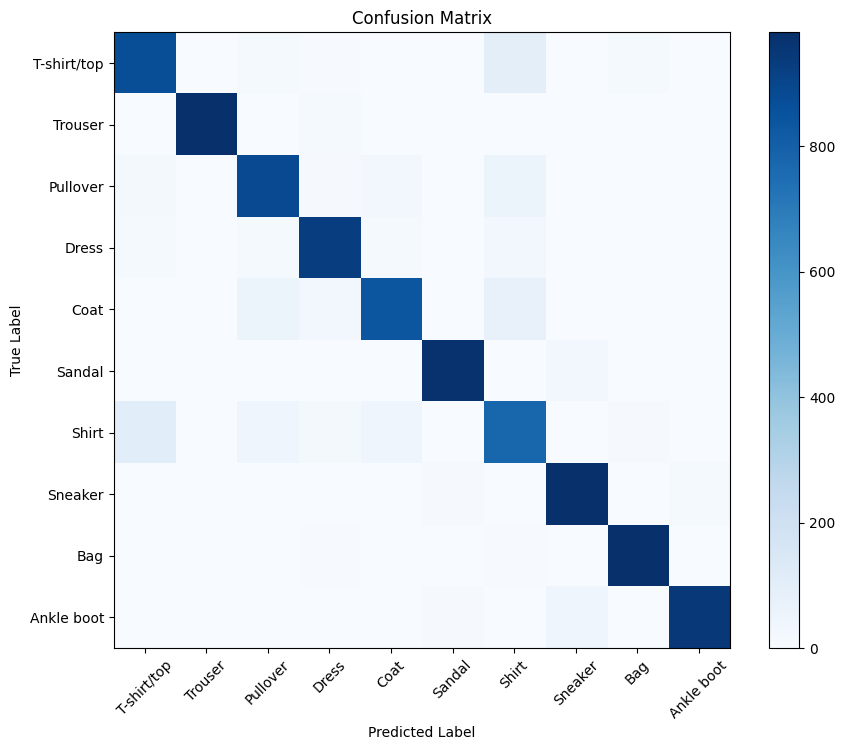

In [152]:
# Step 8: Visualize the results (e.g., confusion matrix, classification report, etc.)
conf_matrix = confusion_matrix(labels, predictions)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [153]:
# Classification Report
print(classification_report(labels, predictions, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.89      0.88      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.90      0.84      0.87      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.75      0.78      0.76      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### 5. Model Deployment (Optional)
    - Save the trained model for future use.
    - Deploy the model for inference on new data (e.g., using PyTorch Serving, PyTorch Lite, etc.).

In [154]:
# Save the trained model
torch.save(model.state_dict(), '../models/fashion_mnist_model.pth')


In [155]:
# Load the saved model
model = FashionCNN()
model.load_state_dict(torch.load('../models/fashion_mnist_model.pth'))
model.eval()


FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)